<a href="https://colab.research.google.com/github/yoyoyo-yo/Gasyori100knock/blob/master/Question_11_20/Question_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 11 - 20

- Q.11 平滑化フィルタ
- Q.12 モーションフィルタ
- Q.13 Max-Minフィルタ
- Q.14 微分フィルタ
- Q.15 プリューウィットフィルタ
- Q.16　ソーベルフィルタ
- Q.17 ラプラシアンフィルタ
- Q.18 エンボスフィルタ
- Q.19 LoGフィルタ
- Q.20 ヒストグラム表示

In [2]:
!pip install numpy matplotlib opencv-python sklearn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
pip install opencv-python

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-contrib-python

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -y libgl1-mesa-dev


Usage:   
  /usr/local/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/local/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/local/bin/python -m pip install [options] [-e] <vcs project url> ...
  /usr/local/bin/python -m pip install [options] [-e] <local project path> ...
  /usr/local/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.


In [6]:
!apt-get update && apt-get upgrade -y

Hit:1 http://deb.debian.org/debian buster InRelease
Get:2 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:3 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main arm64 Packages [280 kB]
Hit:5 https://deb.nodesource.com/node_12.x buster InRelease
Fetched 397 kB in 1s (429 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [7]:
!apt-get install -y libgl1-mesa-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (18.3.6-2+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [8]:
!pip install scikit-image

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


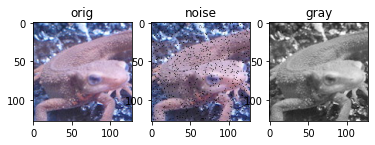

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread("imori.jpg")
img_noise = io.imread("imori_noise.jpg")
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

## Q.11 平滑化フィルタ, Smoothing filter

ノイズ画像に対して、平滑化フィルタ(5x5)をかけよ。

平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタである。

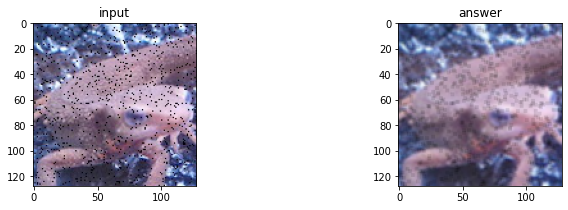

In [10]:
# cv2,.blurは平均値を取るフィルタ関数
img_smoth = cv2.blur(img_noise, (3, 3))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

## Q.12 モーションフィルタ, Motion filter

モーションフィルタ(5x5)を実装せよ。

モーションフィルタとは対角方向の平均値を取るフィルタであり、k x kのフィルタは次式で定義される。

$
\begin{pmatrix}
\frac{1}{k} & 0 & ... & 0 \\
0 & \frac{1}{k} & ... & 0 \\
... \\
0 & 0 & ... & \frac{1}{k}
\end{pmatrix}
$

例えば、カーネルサイズ3x3では次式となる。

$
\begin{pmatrix}
\frac{1}{3} & 0 & 0 \\
0 & \frac{1}{3} & 0 \\
0 & 0 & \frac{1}{3}
\end{pmatrix}
$

In [16]:
class Scratch_filter():
    def __init__(img, k_size=(3, 3)):
        self.img = img.copy().astype(np.float32)
        self.ksize_h, self.ksize_w = k_size
          
    def pading():    
        pad_top, pad_bottom = self.ksize_h, self.ksize_h
        pad_left, pad_right = self.ksize_w, self.ksize_w

        # np.pad: 配列をedge値(端の値)でパディングする。
        _img = np.pad(self.img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    #     print("img-----------------", _img.shape)
        out = np.zeros_like(_img)
    #     print("out------------------", out.shape)

        new_h, new_w = out.shape[:2]
    #     print('new_h, new_w ', new_h, new_w)
    #     print(len(out.shape)) 
        c = 1 if len(out.shape) == 2 else out.shape[2]

In [19]:
img = np.ones(128, 128, 3)

test = Scratch_filter(img, k_size=(5,5))

TypeError: Cannot interpret '128' as a data type

In [14]:
class Scratch_filter():
    def __init__(img, k_size=(3, 3)):
        self.img = img.copy().astype(np.float32)
        self.ksize_h, self.ksize_w = k_size
          
    def pading():    
        pad_top, pad_bottom = self.ksize_h, self.ksize_h
        pad_left, pad_right = self.ksize_w, self.ksize_w

        # np.pad: 配列をedge値(端の値)でパディングする。
        _img = np.pad(self.img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    #     print("img-----------------", _img.shape)
        out = np.zeros_like(_img)
    #     print("out------------------", out.shape)

        new_h, new_w = out.shape[:2]
    #     print('new_h, new_w ', new_h, new_w)
    #     print(len(out.shape)) 
        c = 1 if len(out.shape) == 2 else out.shape[2]

# Q11の解答-------------------------------------------------------------------------------

    def kernel(k_size):
        k = np.zeros(k_size)
        return k[range(k_size[0]), range(k_size[0])] = 1 / k_size[0]
    

    def filter_motion(new_h, ksize_h, ):
        h, w = self.img.shape[:2]
        # filtering
        for iy in range(new_h - ksize_h): # range(261-3)
            for ix in range(new_w - ksize_w): # range(261-3)
                for ic in range(c): # range(3)
                    out[iy, ix, ic] = np.sum(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic] * k)
                                                            #--------------------
                                                            # フィルタの縦幅


        out = out[pad_top : pad_top + h, pad_left : pad_left + w]
        # 指定サイズに制限する。
        return np.clip(out, 0, 255).astype(np.uint8)

In [15]:
img_motion = filter_motion(img_orig)

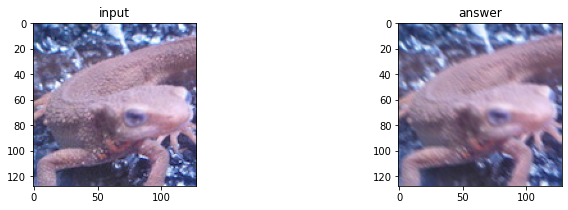

In [13]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_motion)
plt.show()

## Q.13 Max-Minフィルタ, Max-Min filter

グレースケールに対してMAX-MINフィルタ(3x3)を実装せよ。

MAX-MINフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、**エッジ検出**のフィルタの一つである。

エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を**特徴抽出**と呼ぶ。

エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

In [ ]:
def filter_motion(img, k_size=(3, 3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = k_size
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
#     print(h,w)
#     print(pad_top, pad_bottom)
#     print(pad_left, pad_right)
    
    # np.pad: 配列をedge値(端の値)でパディングする。
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
#     print("img-----------------", _img.shape)
    out = np.zeros_like(_img)
#     print("out------------------", out.shape)
    
    new_h, new_w = out.shape[:2]
#     print('new_h, new_w ', new_h, new_w)
#     print(len(out.shape)) 
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # define kernel
    k = np.zeros(k_size) 
    k[range(k_size[0]), range(k_size[0])] = 1 / k_size[0]
#     print("k", k)

    # filtering
    for iy in range(new_h - ksize_h): # range(261-3)
        for ix in range(new_w - ksize_w): # range(261-3)
            for ic in range(c): # range(3)
                out[iy, ix, ic] = np.sum(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic] * k)
                                                        #--------------------
                                                        # フィルタの縦幅
                
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    # 指定サイズに制限する。
    return np.clip(out, 0, 255).astype(np.uint8)

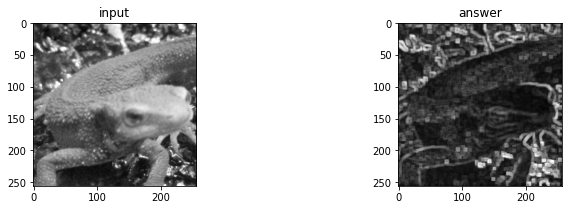

In [12]:
# answer
def filter_max_min(img, ksize=(5, 5)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    if len(_img.shape) == 2:
        _img = np.expand_dims(_img, axis=-1)

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].max() - _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].min()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_mm = filter_max_min(img_gray, (5, 5))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_mm[..., 0], cmap='gray')
plt.show()

## Q.14. 微分フィルタ, Differential filter

グレースケールに対して、微分フィルタ(3x3)を実装せよ。

微分フィルタは輝度の急激な変化が起こっている部分のエッジを取り出すフィルタであり、隣り合う画素同士の差を取る。赤線のR成分を取り出すと輪郭や、目の境目など色が変わる部分でR値が急激に変化している。この部分がエッジとなる。

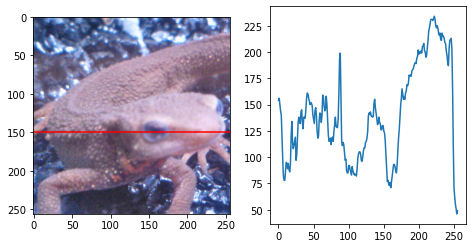

In [13]:
_w = img_orig.shape[1]
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.plot(np.arange(_w), [150] * _w, color='red')
plt.subplot(1, 3, 2); plt.plot(np.arange(_w), img_orig[150, :, 0])
plt.show()

この色の変化量は微分で表される。I(x, y)は画像の(x, y)の位置の輝度にあたる。

$\frac{\partial I(x, y)}{\partial x} = \frac{I(x + 1, y) - I(x, y)}{(x + 1) - x} = I(x + 1, y) - I(x, y)$

つまり隣合うピクセルの差分がピクセルの微分値になる。これを縦方向、横方向で表すと次のフィルタを適用するのと同じになる。
$
\begin{align}
k_x = \begin{pmatrix}
0 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}  & \,\, ,
k_y = \begin{pmatrix}
0 & -1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}
\end{align}
$

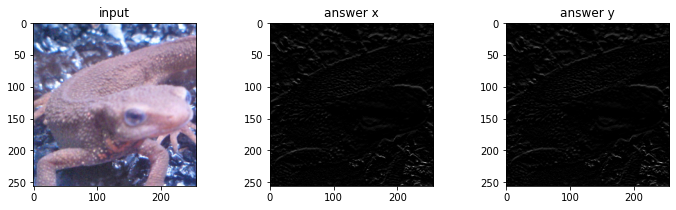

In [14]:
# answer
def filter_diff(img, mode='y'):
    kernel = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])
    if mode == 'y':
        kernel = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
    return cv2.filter2D(img, -1, kernel) 
  
img_diff_x = filter_diff(img_gray)
img_diff_y = filter_diff(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_diff_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_diff_y, cmap='gray')
plt.show()

## Q.15. プリューウィットフィルタ, Prewitt filter

グレースケールに対して、Prewittフィルタ(5x5)を実装せよ。

Prewitt(プレウィット)フィルタはエッジ抽出フィルタの一種であり、カーネルサイズk x kでは次式で定義される。

$
\begin{align}
k_x = \begin{pmatrix}
1 & 0 & ... 0 & -1 \\
1 & 0 & ... 0 & -1 \\
... \\
1 & 0 & ... 0 & -1
\end{pmatrix}  & \,\, ,
k_y = \begin{pmatrix}
1 & 1 & ... & 1 \\
0 & 0 & ... & 0 \\
... \\
-1 & -1 & ... & -1
\end{pmatrix}
\end{align}
$


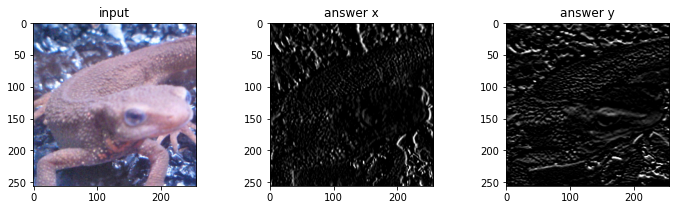

In [15]:
# answer
def filter_prewitt(img, k_size=(3, 3), mode='x'):
    k = np.zeros(k_size)
    if mode == 'x':
        k[:, 0] = 1
        k[:, -1] = -1
    else:
        k[0] = 1
        k[-1] = -1
    return cv2.filter2D(img, -1, k) 
  
img_prewitt_x = filter_prewitt(img_gray)
img_prewitt_y = filter_prewitt(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_prewitt_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_prewitt_y, cmap='gray')
plt.show()

## Q.16. ソーベルフィルタ, Sobel filter

グレースケール に対して、Sobelフィルタ(3x3)を実装せよ。

Sobelフィルタもエッジを抽出するフィルタであり、次式でそれぞれ定義される。
これはprewittフィルタの中心部分に重みをつけたフィルタである。

$
\begin{align}
k_x = \begin{pmatrix}
1 & 0 & ... 0 & -1 \\
... \\
1 & 0 & ... 0 & -1\\
2 & 0 & ... 0 & -2 \\
1 & 0 & ... 0 & -1\\
... \\
1 & 0 & ... 0 & -1
\end{pmatrix} & \,\, ,
k_y = \begin{pmatrix}
1 & ... & 1 & 2 & 1 & ... & 1 \\
0 & ...  \\
... \\
-1 & ... & -1 & -2 & -1 & ... & -1
\end{pmatrix}
\end{align}  
$


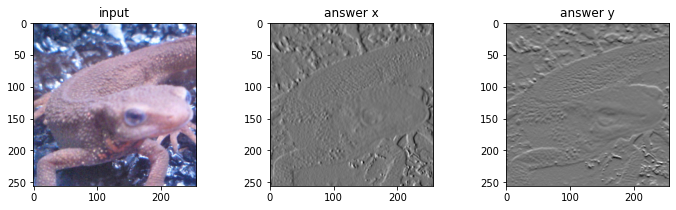

In [16]:
# opencv
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
img_sobel_x -= img_sobel_x.min()  # normalize > [0, 1]
img_sobel_x /= img_sobel_x.max()
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
img_sobel_y -= img_sobel_y.min()  # normalize > [0, 1]
img_sobel_y /= img_sobel_y.max()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_sobel_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_sobel_y, cmap='gray')
plt.show()

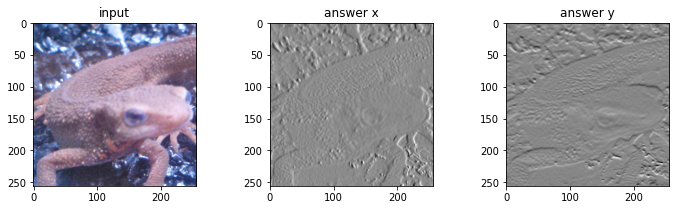

In [17]:
# answer
def filter_sobel(img, k_size=(3, 3), mode='x'):
    k = np.zeros(k_size)
    if mode == 'x':
        k[:, 0] = 1
        k[k_size[0] // 2, 0] = 2
        k[:, -1] = -1
        k[k_size[0] // 2, -1] = -2
    else:
        k[0] = 1
        k[0, k_size[0] // 2] = 2
        k[-1] = -1
        k[-1, k_size[0] // 2] = -2
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min()  # normalize > [0, 1]
    out /= out.max()
    return out
  
img_sobel_x = filter_sobel(img_gray)
img_sobel_y = filter_sobel(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_sobel_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_sobel_y, cmap='gray')
plt.show()

## Q.17. ラプラシアンフィルタ, Laplacian filter

グレースケールに対して、Laplacianフィルタを実装せよ。

Laplacianフィルタとは輝度の二次微分をとることでエッジ検出を行うフィルタである。

デジタル画像は離散データであるので、x方向・y方向の一次微分は、それぞれ次式で表される。（微分フィルタと同じ）

$I_x = I(x + 1, y) - I(x, y)$
$I_y = I(x, y + 1) - I(x, y)$

さらに、二次微分は次式となる。

$
I_{xx} = \frac{I_x(x, y) - I_x(x -1, y)}{(x + 1) - x} = I_x(x, y) - I_x(x - 1, y) = I(x + 1, y) - 2I(x, y) + I(x - 1, y)
$

$I_{yy} = I(x, y + 1) - 2I(x, y) + I(x, y - 1)$

これらより、ラプラシアンはx,yの両方の偏微分の和となり、次式で定義される。

$D^2I(x, y) = I_{xx} + I_{yy} = I(x + 1, y) + I(x, y + 1) - 4I(x, y) + I(x - 1, y) + I(x, y - 1)$

これをカーネルで表すと、次式となる。

$
k = \begin{pmatrix}
0 & 1 & 0 \\
1 & -4 & 1  \\
0 & 1 & 0
\end{pmatrix}
$

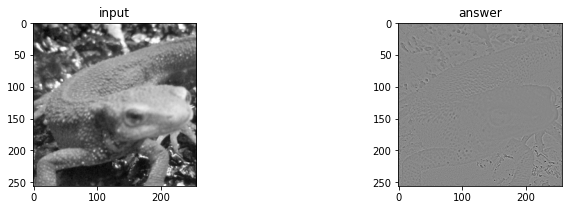

In [18]:
# opencv
img_lapl = cv2.Laplacian(img_gray, cv2.CV_32F)
img_lapl -= img_lapl.min()  # normalize > [0, 1]
img_lapl /= img_lapl.max()

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_lapl, cmap='gray')
plt.show()

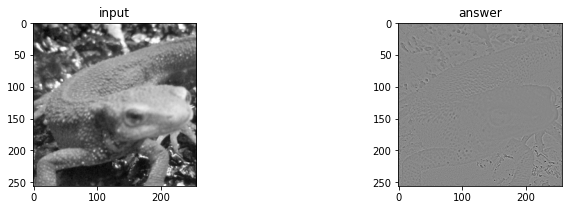

In [19]:
# answer
def filter_laplacian(img):
    k = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min() # normalize > [0, 1]
    out /= out.max() 
    return out

img_lapl = filter_laplacian(img_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_lapl, cmap='gray')
plt.show()

## Q.18. エンボスフィルタ, Emboss filter
グレースケールに対して、Embossフィルタを実装せよ。

Embossフィルタとは輪郭部分を浮き出しにするフィルタで、次式で定義される。

$
k = \begin{pmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1  \\
0 & 1 & 2
\end{pmatrix}
$

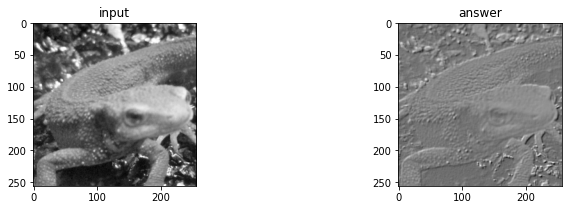

In [20]:
# answer
def filter_emboss(img):
    k = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min() # normalize > [0, 1]
    out /= out.max() 
    return out

img_emboss = filter_emboss(img_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_emboss, cmap='gray')
plt.show()

## Q.19. LoGフィルタ, LoG filter

LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、*imori_noise_256x256.png*のエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

Laplcianフィルタは二次微分をとるのでノイズが強調されるのを防ぐために、予めGaussianフィルタでノイズを抑える。LoGフィルタは次式で定義される。

ラプラシアンを$\nabla^2$、ガウシアンフィルタを$G$、画像を$I$とする。次式によって、ガウシアンフィルタリング後にラプラシアンフィルタする操作を、ガウシアンフィルタをラプラシアンしたものでフィルタリングする操作に置き換えることが可能。

$\nabla^2 (G \ast I) = (\nabla^2 G) \ast I$ 

ラプラシアンフィルタの中身はxとyに関する２時微分の和で表される。ガウシアンフィルタをxに関して１時微分したものは、次式。

$ \frac{\partial}{\partial x} G =  \frac{\partial}{\partial x} \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2 \sigma^2}} = \frac{1}{2\pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma^2}}(- \frac{x}{\sigma^2})$ 

２時微分は次式。

$ \frac{\partial^2 }{\partial^2 x} G
 = \frac{1}{2\pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma^2}}(- \frac{x}{\sigma^2} + \frac{x^2}{\sigma^4}  )$ 

yに関してはxの部分を入れ替えるだけでいいので、LoGフィルタは次式となる。

$ k = \nabla^2G = (\frac{\partial^2}{\partial^2x} + \frac{\partial^2}{\partial^2y} )G
= \frac{x^2 + y^2 - 2 \sigma^2}{2 \pi \sigma^6}e^{-\frac{x^2 + y^2}{2 \sigma^2}} $

<ipython-input-21-1e06f8977a73>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k = np.zeros(k_size, dtype=np.float)


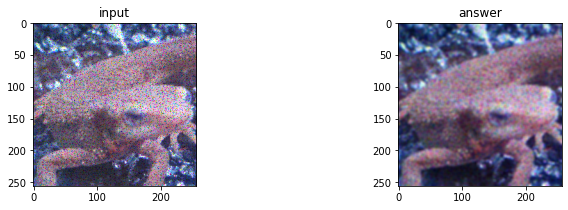

In [21]:
# answer
def filter_LoG(img, k_size=(3, 3), sigma=1.2):
    # kernel
    k = np.zeros(k_size, dtype=np.float)
    pad_x = k_size[0] // 2
    pad_y = k_size[1] // 2
    for x in range(-pad_y, -pad_y + k_size[1]):
        for y in range(-pad_x, -pad_x + k_size[0]):
            k[y + pad_y, x + pad_y] = (x ** 2 + y ** 2 - 2 * (sigma ** 2)) * np.exp( - (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    k /= (2 * np.pi * (sigma ** 6))
    k /= k.sum()
 
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min() # normalize > [0, 1]
    out /= out.max() 
    return out

img_log = filter_LoG(img_noise, k_size=(5, 5), sigma=3)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_log, cmap='gray')
plt.show()

### カーネルのパラメータを変える

カーネルサイズを大きくすると画像が暗くなるが、$\sigma$を大きくするとノイズが消えて、かつ画像も明るくなった。

<ipython-input-21-1e06f8977a73>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k = np.zeros(k_size, dtype=np.float)


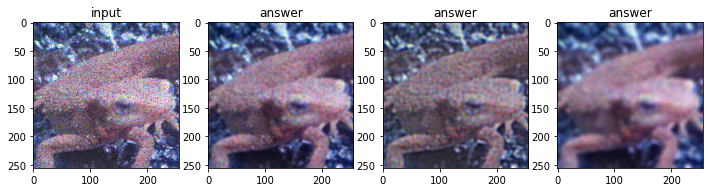

In [22]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1); plt.title('input'); plt.imshow(img_noise)

img_log = filter_LoG(img_noise, k_size=(5, 5), sigma=3)
plt.subplot(1, 4, 2); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, k_size=(12, 12), sigma=3)
plt.subplot(1, 4, 3); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, k_size=(9, 9), sigma=9)
plt.subplot(1, 4, 4); plt.title('answer'); plt.imshow(img_log)
plt.show()

### Laplacian + Gaussian との比較

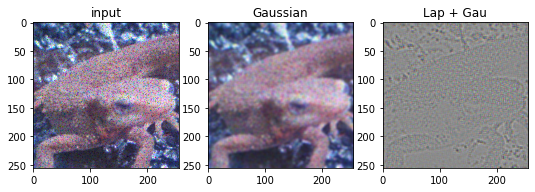

In [23]:
img_gau = cv2.GaussianBlur(img_noise, (5, 5), 3)
img_lapl = filter_laplacian(img_gau.astype(np.float32))
img_lapl -= img_lapl.min()  # normalize > [0, 1]
img_lapl /= img_lapl.max()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(img_noise); plt.title('input')
plt.subplot(1, 4, 2); plt.imshow(img_gau); plt.title('Gaussian')
plt.subplot(1, 4, 3); plt.imshow(img_lapl); plt.title('Lap + Gau')
plt.show()

## Q.20. ヒストグラム表示

matplotlibを用いて*imori_256x256_dark.png*のヒストグラムを表示せよ。

ヒストグラムとは画素の出現回数をグラフにしたものである。
matplotlibではhist()という関数がすでにあるので、それを利用する。

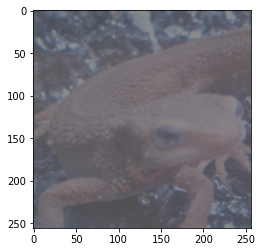

In [24]:
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256_dark.png')
plt.imshow(img_dark); plt.show()

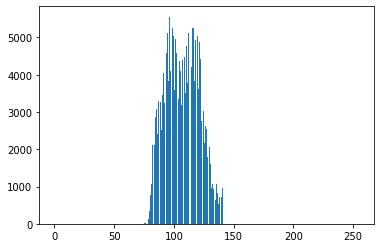

In [25]:
plt.hist(img_dark.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()